# POC : Exam Type Classification with Machine Learning in Radimetrics

### Description
This notebook introduces a pioneering Proof of Concept (POC) titled "Exam Type Classification with Machine Learning in Radimetrics." Within the dynamic realm of healthcare data analysis, the team aims to develop an automated system utilizing machine learning to classify medical exam types. The focus is on extracting insights from textual information within Radimetrics data. The decision to incorporate machine learning in this POC is driven by the healthcare industry's need for efficiency and accuracy, particularly in the face of the substantial volume of medical data encountered in radiology departments. The goal is to provide healthcare professionals with a tool that can rapidly and accurately classify medical exam types amidst the vast amount of data.







## Table Of Contents 

### [Section 1](#sec_1) : Use Case 
### [Section 2](#sec_2) : Data Framing 
   #### [Section 2.1](#sec_2_1) : Data Loading
   #### [Section 2.2](#sec_2_2) : Data Profiling
   #### [Section 2.3](#sec_2_3): Data Modelling
### [Section 3](#sec_3): Model Training 
   #### [Section 3.1](#sec_3_1) :  Decision Tree
   #### [Section 3.2](#sec_3_2)  : Random Forest
   #### [Section 3.3](#sec_3_3)  : Support Vector Machine
   #### [Section 3.4](#sec_3_4) :  K-Nearest Neighbours
   #### [Section 3.5](#sec_3_5) :  Naive Bayes
   #### [Section 3.6](#sec_3_6) :  Logistic Regression
### [Section 4](#sec_4): Model Evaluation 
   #### [Section 4.1](#sec_4_1):  Accuracy Comparison
   #### [Section 4.2](#sec_4_2):  F1 Score Comparison
### [Section 5](#sec_5) : Model Benchmarking 


-----------------------------------------------------------------------------------------------------
## Introduction
-----------------------------------------------------------------------------------------------------

Radimetrics is a software solution and platform used in the healthcare and medical imaging fields, particularly in radiology departments and medical imaging facilities. Radimetrics primarily focuses on radiation dose management and workflow optimization. Radimetrics provides tools and software to help healthcare providers monitor and manage radiation doses delivered to patients during various medical imaging procedures, such as X-rays, CT scans, and nuclear medicine scans. This is important for ensuring that patients receive the lowest effective dose of radiation while still obtaining accurate diagnostic results.

![Alt Text](RadimetricsSS.png)

-----------------------------------------------------------------------------------------------------
## Section 1 : Use Case <a id='sec_1'></a>
-----------------------------------------------------------------------------------------------------

## Use Case Title: Automated Classification of Medical Exam Types

## Use Case Description:

As a healthcare data analysis team, we aim to develop an automated system that classifies medical exam types based on textual information provided in "Protocol" and "Study Description" fields. This use case encompasses the development of multiple machine learning models and their evaluation to achieve accurate and efficient classification of medical exam types from the dataset.

The "Prediction of Exam Type from Study Description and Protocol" project is aimed at developing an intelligent application that utilizes advanced machine learning techniques to predict the type of exam based on study descriptions and protocols. The application aims to enhance accuracy, user interaction, and customization, ultimately providing a valuable tool for the team.

## Features:

### Higher Degree of Correctness ✔️: 
The primary goal of the project is to achieve a remarkable level of prediction correctness. The developed model should demonstrate a strong capability to analyze study descriptions and protocols and  correctly predict the corresponding exam type. Rigorous testing and fine-tuning will be conducted to ensure the model's correctness.

### Relearning Option with Additional Data 🔄: 
To continuously improve the prediction accuracy, the application should incorporate a relearning feature. This functionality will enable users to update and refine the underlying model by integrating additional data. This iterative learning process will help the model adapt to evolving patterns and trends.

### User-Assisted Correction 🖋️: 
Despite the advanced predictive capabilities, incorrect predictions can still occur due to the complexity of the input data. The application should empower users to identify and rectify wrong predictions. Users will have the ability to manually correct misclassified predictions, contributing to both model refinement and user engagement.

### Tabular Result Presentation 📊: 
The project envisions presenting the prediction results in a structured and easily interpretable format. The application should organize the predictions and accompanying confidence values in a tabular layout. This format ensures efficient review and analysis of prediction outcomes.

### Confidence Value for Predictions 🎯: 
Each prediction made by the model will be associated with a confidence value. This value indicates the model's level of certainty regarding its prediction. Users can use these confidence values to assess the reliability of the predictions and make informed decisions based on them.

### Classification Result Filtering 🏷️: 
To enhance user experience and streamline result interpretation, the application will implement filters for classification results. Users can apply filters based on confidence thresholds or other criteria, allowing them to focus on predictions that meet their desired criteria.

### Manual Entry for Predictions 📝:
Alongside the automated prediction process, the application should facilitate manual entry of predictions. This feature accommodates cases where users have prior knowledge about the exam type, allowing them to directly input their insights.

-----------------------------------------------------------------------------------------------------
## Section 2 : Data Framing <a id='sec_2'></a>
-----------------------------------------------------------------------------------------------------

In [93]:
# Importing all the necessary libraries
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas_profiling
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [94]:
# Reading the dataset
data = pd.read_csv("new_dataset.csv") 
data


,index,Exam Type,Protocol,Study Description
0,111,ABD PEL,6.1 Abdomen Pelvis,CT Abdomen Pelvis w/
1,112,ABD PEL,01_ROUTINE_ABD_PEL,Abdomen 01_ROUTINE_ABD_PEL (Adult)
2,113,ABD PEL,01Abdpel WWO,Abdomen 01Abdpel WWO (Adult)
3,114,ABD PEL,ABD_PEL_WO,CT Abdomen Pelvis w/o 74176
4,115,ABD PEL,3_PHASE_ABD_WO_W,Abdomen 3_PHASE_ABD_WO_W (Adult)
...,...,...,...,...
930,1041,UE,Unknown Protocol Name,Upper Extremities EXTREMITY_FULL_FOV (Adult)
931,1042,UE,Unknown Protocol Name,Vascular CTA_UPPER_EXT (Adult)
932,1043,UE,Unknown Protocol Name,Vascular CTA_UPPEREXT (Adult)
933,1044,LE,9.1 Lower Extremity,CT Ankle RT w/o Contr


#### Explanation of Dataset : <a id='sec_2_1'></a>
The provided data represents information related to a medical examination. Specifically, it includes details about Exam Type, Protocol, and Study Description for a particular medical imaging procedure. The "Exam Type" is labeled as "UE," which typically stands for an Ultrasound Examination. The "Protocol" specifies the imaging parameters or technique used, for example, indicating "Right Wrist 2mm." Lastly, the "Study Description" provides a concise description of the procedure, for example, stating that it is a "CT WRIST W/O CONTRAST RIGHT," implying that it is a non-contrast computed tomography (CT) scan of the right wrist, likely performed for diagnostic or evaluation purposes.

Exam Type: This column represents a unique identifier or code for different types of medical imaging exams or procedures. Each value in this column corresponds to a specific type of radiological examination.

Protocol: The "Protocol" column refers to the standardized imaging procedure name or technique used for the corresponding exam type by the operator/technician. Different protocols can involve variations in imaging parameters, such as contrast usage or image acquisition settings.

Study Description: This column contains a brief textual description of the study or imaging examination being performed which is the standardized name. The study description helps healthcare professionals and radiologists quickly understand the nature of the imaging study.

In [95]:
# Utilising the dataset by pandas
df = pd.DataFrame(data)

In [96]:
# Setting data profiling
profile = pandas_profiling.ProfileReport(df)

#### Profiling the data <a id='sec_2_2'></a>

In [97]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Approach Using Combination of 'Protocol' and 'Study Description' as one entity and combining them together to form the basis of exam type classification

To create meaningful features for our classification task, we combine the information from 'Protocol' and 'Study Description.' We do this by creating a new column in the DataFrame called 'Text,' which contains the concatenated text from 'Protocol' and 'Study Description.' The combination of these two columns into one unified text entity allows us to use this text as a feature for our classification model.<a id='sec_2_3'></a>

In [98]:
df['Text'] = df['Protocol'] + ' ' + df['Study Description']

In [99]:
X = df['Text']
y = df['Exam Type']

In [100]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

![Alt Text](data_split.png)

The 'train_test_split' function is used to partition the data. We allocate 80% of the data to the training set, stored in 'X_train' and 'y_train,' and the remaining 20% to the temporary set (X_temp and y_temp). Then, we split the temporary set into a testing set (X_test and y_test) and a validation set (X_val and y_val) with a 50% split. This ensures that each of these sets has 10% of the original data (half of the temporary set). The 'random_state' parameter is set to 42, which ensures that the data split will be the same each time the code is executed, providing reproducibility for the training and testing process.

#### Approach Using 'Protocol' and 'Study Description' as individual entity and setting two different classification factors for predicting exam type

Rather than combining 'Protocol' and 'Study Description' into a single text entity, here they are treated as separate entities for classification.

In [101]:
X_protocol = df['Protocol']
X_study_desc = df['Study Description']
y = df['Exam Type']

In [102]:
X_train_protocol, X_temp_protocol, X_train_study_desc, X_temp_study_desc, y_train, y_temp = train_test_split(
    X_protocol, X_study_desc, y, test_size=0.2, random_state=42
)
X_test_protocol, X_val_protocol, X_test_study_desc, X_val_study_desc, y_test, y_val = train_test_split(
    X_temp_protocol, X_temp_study_desc, y_temp, test_size=0.5, random_state=42
)

-----------------------------------------------------------------------------------------------------
## Section 3 : Model Training <a id='sec_3'></a>
-----------------------------------------------------------------------------------------------------

![Alt Text](ml.jpeg)

Machine learning is a process where computers learn from data to make predictions or decisions without being explicitly programmed. The typical steps in a machine learning process are as follows:

#### Data Collection: 
Gathering relevant data, which serves as the foundation for the learning process. For this process, we have taken the dataset excel file. 

#### Feature Engineering: 
Selecting, transforming, or creating features (variables) that are most informative for the task. Feature engineering helps the model to understand patterns in the data. We have considered the study description and protocol columns as features for our model

#### Model Selection: 
Choosing an appropriate machine learning algorithm or model based on the nature of the problem (e.g., classification, regression, clustering) and the characteristics of the data. Here, we are trying with multiple models to select the best optimum one for our operation.

#### Training: 
Feeding the model with a portion of the data (training data) to learn patterns and relationships. The model adjusts its parameters iteratively to minimize errors or maximize accuracy.

#### Validation: 
Evaluating the model's performance on a separate dataset (validation data) to check for overfitting, where the model performs well on the training data but poorly on new, unseen data.

#### Hyperparameter Tuning: 
Adjust the model's hyperparameters (settings that are not learned from data) to optimize its performance. This process often involves cross-validation.

#### Testing: 
Finally, testing the trained model on a completely independent dataset (test data) to assess its real-world performance and make predictions or classifications.

-------------------------------------------------------------------------------------------


In [103]:
# Function to train and evaluate models
def train_and_evaluate_model(pipeline, X_train, y_train, X_val, y_val, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    report_val = classification_report(y_val, y_pred_val, output_dict=True)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    return accuracy_val, report_val, y_pred_val, accuracy_test, report_test, y_pred_test

This function trains and evaluates machine learning models. It takes a pipeline (a sequence of data processing and modeling steps), training data (X_train and y_train), and testing data (X_test and y_test) as inputs. It does the following:

#### Training: 
It trains the model using the training data (X_train and y_train) provided in the pipeline.

#### Prediction: 
It then uses the trained model to make predictions on the testing data (X_test) and stores the predictions in 'y_pred.'

#### Evaluation: 
The function calculates the accuracy of the model by comparing the predicted results (y_pred) with the true labels (y_test). It also generates a classification report that provides more detailed performance metrics.

#### Results: 
The function returns the accuracy score, the classification report, and the model's predictions on the test data.

This function is a convenient way to encapsulate the process of training and evaluating machine learning models, making it easier to compare and assess the performance of different models.







### Section 3.1 : Decision Tree <a id='sec_3_1'></a>

A decision tree is a fundamental machine learning algorithm that mimics the human decision-making process. It is used for both classification and regression tasks, where it breaks down a complex decision into a series of simpler decisions, represented as a tree-like structure. Each node in the tree represents a feature, and each branch represents a possible outcome or decision based on that feature. Decision trees are widely employed for their simplicity, interpretability, and ability to handle both categorical and numerical data, making them a valuable tool in various domains, from finance to healthcare, for making data-driven decisions.

![Alt Text](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)
![Alt Text](https://cdn-images-1.medium.com/v2/resize:fit:824/0*J2l5dvJ2jqRwGDfG.png)

#### Using Decision Tree for the 'combined' approach

In [104]:
decision_tree_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [105]:
accuracy_val_combined_dt, report_val_combined_dt, y_pred_val_dt, accuracy_test_combined_dt, report_test_combined_dt, y_pred_test_dt = train_and_evaluate_model(decision_tree_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)


In [106]:
print("Decision Tree (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_dt * 100) )

Decision Tree (Combined Approach) Accuracy: 84.95%


In [107]:
print("Decision Tree (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_dt).transpose()
df

Decision Tree (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.902439,0.925000,0.913580,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,1.000000,0.500000,0.666667,10.000000
HEART,0.666667,1.000000,0.800000,2.000000
LE,1.000000,0.800000,0.888889,5.000000
MAXILLOFACIAL,0.444444,1.000000,0.615385,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.333333,0.500000,0.400000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


#### Using Decision Tree for the 'separated' approach

In [108]:
decision_tree_pipeline_protocol = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
decision_tree_pipeline_study_desc = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [109]:
accuracy_protocol_dt, report_protocol_dt, y_pred_protocol_dt, accuracy_test_protocol_dt, report_test_protocol_dt, y_pred_test_protocol_dt = train_and_evaluate_model(decision_tree_pipeline_protocol, X_train_protocol, y_train, X_val_protocol, y_val, X_test_protocol, y_test)

In [110]:
accuracy_study_desc_dt, report_study_desc_dt, y_pred_study_desc_dt, accuracy_test_study_desc_dt, report_test_study_desc_dt, y_pred_test_study_desc_dt = train_and_evaluate_model(decision_tree_pipeline_study_desc, X_train_study_desc, y_train, X_val_study_desc, y_val, X_test_study_desc, y_test)

In [111]:
print("Decision Tree (Separated Approach) Study Description Accuracy: {:.2f}%".format(accuracy_test_study_desc_dt * 100)  )

Decision Tree (Separated Approach) Study Description Accuracy: 84.95%


In [112]:
print("Decision Tree (Separated Approach) Protocol Accuracy: {:.2f}%".format(accuracy_test_protocol_dt * 100))

Decision Tree (Separated Approach) Protocol Accuracy: 70.97%


In [113]:
print("Decision Tree (Separated Approach) Study Description Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_study_desc_dt).transpose()
df

Decision Tree (Separated Approach) Study Description Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.860465,0.925000,0.891566,40.000000
BIOPSY/PROCEDURE,0.000000,0.000000,0.000000,0.000000
CAP,0.500000,0.333333,0.400000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,0.769231,1.000000,0.869565,10.000000
HEART,0.666667,1.000000,0.800000,2.000000
LE,1.000000,0.800000,0.888889,5.000000
MAXILLOFACIAL,0.000000,0.000000,0.000000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000


In [114]:
print("Decision Tree (Separated Approach) Protocol Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_protocol_dt).transpose()
df

Decision Tree (Separated Approach) Protocol Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.597015,1.000000,0.747664,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,1.000000,0.500000,0.666667,8.000000
HEAD,1.000000,0.400000,0.571429,10.000000
HEART,1.000000,0.500000,0.666667,2.000000
LE,1.000000,0.400000,0.571429,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,0.625000,0.769231,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,0.600000,0.750000,5.000000


### Section 3.2 : Random Forest <a id='sec_3_2'></a>

Random Forest is a versatile machine learning technique that combines multiple decision trees to make accurate predictions in both classification and regression tasks. By using random subsets of data and features, it reduces overfitting and improves generalization. Its ability to handle large datasets and reveal feature importance makes it a popular choice in machine learning.

![Alt Text](https://miro.medium.com/v2/resize:fit:1358/1*i69vGs4AfhdhDUOlaPVLSA.png)
![Alt Text](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png)

#### Using Random Forest for the 'combined' approach

In [115]:
rf_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
])

This pipeline takes raw text data as input, converts it into numerical features using a combination of unigrams and bigrams, and then feeds these features into a Random Forest classifier with a large number of decision trees for classification tasks. 

In [116]:
accuracy_val_combined_rf, report_val_combined_rf, y_pred_val_rf, accuracy_test_combined_rf, report_test_combined_rf, y_pred_test_rf = train_and_evaluate_model(rf_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)

accuracy_val_combined_rf: This is the accuracy of RF model on the validation set, which is typically used during model development and hyperparameter tuning. It helps to assess how well the model is performing during the training process and allows us to make adjustments as needed. It gives us an idea of how our model generalizes to unseen data from the same distribution as the training data.

accuracy_test_combined_rf: This is the accuracy of RF model on the test set, which is a separate dataset not used during training or validation. The test set is meant to provide an unbiased evaluation of the model's performance and how it will likely perform in a real-world scenario. It gives us an estimate of how well the model will perform when deployed.

In [117]:
print("Random Forest (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_rf * 100))

Random Forest (Combined Approach) Accuracy: 83.87%


In [118]:
print("Random Forest (Combined Approach) Report:")
print(" ")
df = pd.DataFrame(report_test_combined_rf).transpose()
df

Random Forest (Combined Approach) Report:
 


,precision,recall,f1-score,support
ABD PEL,0.754717,1.000000,0.860215,40.00000
CAP,0.600000,1.000000,0.750000,3.00000
CHEST,1.000000,0.500000,0.666667,8.00000
HEAD,1.000000,0.600000,0.750000,10.00000
HEART,1.000000,1.000000,1.000000,2.00000
LE,1.000000,0.800000,0.888889,5.00000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.00000
NECK,1.000000,1.000000,1.000000,8.00000
PELVIS,0.000000,0.000000,0.000000,2.00000
SPINE,1.000000,1.000000,1.000000,5.00000


#### Using Random Forest for the 'seperated' approach

In [119]:
pipeline_protocol = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
])
pipeline_study_desc = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=42))
])

In [120]:
accuracy_protocol_rf, report_protocol_rf, y_pred_protocol_rf, accuracy_test_protocol_rf, report_test_protocol_rf, y_pred_test_protocol_rf = train_and_evaluate_model(pipeline_protocol, X_train_protocol, y_train, X_val_protocol, y_val, X_test_protocol, y_test)


In [121]:
accuracy_study_desc_rf, report_study_desc_rf, y_pred_study_desc_rf, accuracy_test_study_desc_rf, report_test_study_desc_rf, y_pred_test_study_desc_rf = train_and_evaluate_model(pipeline_study_desc, X_train_study_desc, y_train, X_val_study_desc, y_val, X_test_study_desc, y_test)


In [122]:
print("Random Forest (Seperated Approach) Study Desc Accuracy: {:.2f}%".format(accuracy_test_study_desc_rf * 100))

Random Forest (Seperated Approach) Study Desc Accuracy: 84.95%


In [123]:
print("Random Forest (Seperated Approach) Study Desc Accuracy: {:.2f}%".format(accuracy_test_protocol_rf * 100))

Random Forest (Seperated Approach) Study Desc Accuracy: 70.97%


In [124]:
print("Random Forest (Seperated Approach) Study Desc Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_study_desc_rf).transpose()
df

Random Forest (Seperated Approach) Study Desc Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.847826,0.975000,0.906977,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,0.750000,0.900000,0.818182,10.000000
HEART,0.666667,1.000000,0.800000,2.000000
LE,0.800000,0.800000,0.800000,5.000000
MAXILLOFACIAL,0.000000,0.000000,0.000000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


In [125]:
print("Random Forest (Seperated Approach) Protocol Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_protocol_rf).transpose()
df

Random Forest (Seperated Approach) Protocol Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.597015,1.000000,0.747664,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,1.000000,0.500000,0.666667,8.000000
HEAD,1.000000,0.400000,0.571429,10.000000
HEART,1.000000,0.500000,0.666667,2.000000
LE,1.000000,0.400000,0.571429,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,0.625000,0.769231,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,0.600000,0.750000,5.000000


### Section 3.3 : Support Vector Machine <a id='sec_3_3'></a>

The Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm primarily used for classification tasks. It works by finding a hyperplane that maximizes the margin between different classes in the data, making it highly effective for both linear and nonlinear classification problems. SVMs are known for their ability to handle high-dimensional data and work well with small to medium-sized datasets. They can also be used for regression tasks. SVMs are especially valuable when clear class separation is critical, and they offer robust generalization capabilities. Additionally, they can be fine-tuned using different kernel functions to handle complex, non-linear data distributions.

![Alt Text](https://editor.analyticsvidhya.com/uploads/567891.png)
![Alt Text](https://siegel.work/blog/SVM/img/3_Good_Threshold.svg)

#### Using Support Vector Machine for the 'combined' approach

In [126]:
svm_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', SVC(random_state=42))
])

In [127]:
accuracy_val_combined_svm, report_val_combined_svm, y_pred_val_svm, accuracy_test_combined_svm, report_test_combined_svm, y_pred_test_svm = train_and_evaluate_model(svm_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)

In [128]:
print("Support Vector Machine (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_svm * 100))

Support Vector Machine (Combined Approach) Accuracy: 84.95%


In [129]:
print("Support Vector Machine (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_svm).transpose()
df

Support Vector Machine (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.816327,1.000000,0.898876,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.714286,0.625000,0.666667,8.000000
HEAD,0.750000,0.900000,0.818182,10.000000
HEART,1.000000,0.500000,0.666667,2.000000
LE,1.000000,0.800000,0.888889,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


### Section 3.4 : K-Nearest Neighbours <a id='sec_3_4'></a>

The k-nearest neighbors (KNN) algorithm is a simple yet powerful technique used for classification and regression tasks. KNN works by identifying the k-nearest data points to a given input sample in a dataset, based on a chosen distance metric, such as Euclidean distance. It then makes predictions by taking a majority vote among the class labels of these nearest neighbors for classification or by averaging their values for regression. KNN's flexibility and ease of implementation make it a popular choice for various applications, from recommendation systems to image recognition, where the local structure of data points plays a crucial role in making accurate predictions.

![Alt Text](https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png)
![Alt Text](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

#### Using K-Nearest Neighbors for the 'combined' approach

In [130]:
knn_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', KNeighborsClassifier())
])

In [131]:
accuracy_val_combined_knn, report_val_combined_knn, y_pred_val_knn, accuracy_test_combined_knn, report_test_combined_knn, y_pred_test_knn = train_and_evaluate_model(knn_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)

In [132]:
print("K-Nearest Neighbors (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_knn * 100))

K-Nearest Neighbors (Combined Approach) Accuracy: 84.95%


In [133]:
print("K-Nearest Neighbors (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_knn).transpose()
df

K-Nearest Neighbors (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.869565,1.000000,0.930233,40.000000
CAP,0.600000,1.000000,0.750000,3.000000
CHEST,0.666667,0.500000,0.571429,8.000000
HEAD,0.750000,0.900000,0.818182,10.000000
HEART,1.000000,1.000000,1.000000,2.000000
LE,1.000000,0.600000,0.750000,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,0.875000,0.933333,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


### Section 3.5 : Naive Bayes <a id='sec_3_5'></a>

Naive Bayes is a popular and simple machine learning algorithm used for classification tasks. It is based on Bayes' theorem and assumes that all features are independent of each other, which is often an oversimplification but can still yield surprisingly good results in practice. Naive Bayes is particularly effective for text classification tasks, such as spam detection and sentiment analysis, and it's computationally efficient, making it a valuable tool in many real-world applications where speed and simplicity are essential.

![Alt Text](https://mlarchive.com/wp-content/uploads/2023/02/Implementing-Naive-Bayes-Classification-using-Python-1-1.png)
![Alt Text](https://miro.medium.com/v2/resize:fit:861/1*HLfuyrLIZKGQL0JPM5o4Ig.png)

#### Using Naive Bayes for the 'combined' approach

In [134]:
naive_bayes_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

In [135]:
accuracy_val_combined_nb, report_val_combined_nb, y_pred_val_nb, accuracy_test_combined_nb, report_test_combined_nb, y_pred_test_nb = train_and_evaluate_model(naive_bayes_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)


In [136]:
print("Naive Bayes (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_nb * 100))

Naive Bayes (Combined Approach) Accuracy: 77.42%


In [137]:
print("Naive Bayes (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_nb).transpose()
df

Naive Bayes (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.655738,1.000000,0.792079,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,1.000000,0.500000,0.666667,8.000000
HEAD,1.000000,0.500000,0.666667,10.000000
HEART,0.000000,0.000000,0.000000,2.000000
LE,1.000000,0.800000,0.888889,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,0.875000,0.933333,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


### Section 3.6 : Logistic Regression <a id='sec_3_6'></a>

Logistic regression is a fundamental machine learning algorithm used for binary classification tasks. Unlike linear regression, which predicts continuous values, logistic regression models the probability of an input belonging to one of two possible classes, typically denoted as 0 and 1. It does so by applying the logistic or sigmoid function to the linear combination of input features, mapping the result to a probability score between 0 and 1. This makes logistic regression particularly useful for problems like spam detection, disease diagnosis, or sentiment analysis, where the goal is to categorize data into two distinct classes. Its simplicity, interpretability, and effectiveness in a wide range of applications make logistic regression a popular choice in the machine learning toolkit.

![Alt Text](https://miro.medium.com/v2/resize:fit:460/1*klFuUpBGVAjTfpTak2HhUA.png)
![Alt Text](https://prwatech.in/blog/wp-content/uploads/2020/02/logi1.png)

#### Using Logistic Regression for the 'combined' approach

In [138]:
logistic_regression_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [139]:
accuracy_val_combined_lr, report_val_combined_lr, y_pred_val_lr, accuracy_test_combined_lr, report_test_combined_lr, y_pred_test_lr = train_and_evaluate_model(logistic_regression_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)

In [140]:
print("Logistic Regression (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_lr * 100))

Logistic Regression (Combined Approach) Accuracy: 84.95%


In [141]:
print("Logistic Regression (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_lr).transpose()
df

Logistic Regression (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.769231,1.000000,0.869565,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,1.000000,0.600000,0.750000,10.000000
HEART,1.000000,1.000000,1.000000,2.000000
LE,1.000000,1.000000,1.000000,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


-----------------------------------------------------------------------------------------------------
## Section 4 : Model Evaluation <a id='sec_4'></a>
-----------------------------------------------------------------------------------------------------

In [142]:
#### Comparing Model Performances

In [143]:
# Creating a dictionary to store model names and their accuracy scores
model_names = ['Random Forest (Combined)',
              'Logistic Regression (Combined)', 'Support Vector Machine (Combined)',
              'K-Nearest Neighbors (Combined)', 'Naive Bayes (Combined)', 'Decision Tree (Combined)']

In [144]:
accuracies = [accuracy_test_combined_rf,
              accuracy_test_combined_lr, accuracy_test_combined_svm,
              accuracy_test_combined_knn, accuracy_test_combined_nb, accuracy_test_combined_dt]

In [161]:
table_data = [
    ["Random Forest", accuracy_test_combined_rf * 100],
    ["Logistic Regression", accuracy_test_combined_lr * 100],
    ["SVM", accuracy_test_combined_svm * 100],
    ["KNN", accuracy_test_combined_knn * 100],
    ["Naive Bayes", accuracy_test_combined_nb * 100],
    ["Decision Tree", accuracy_test_combined_dt * 100],
]
table_headers = ["Model", "Accuracy (%)"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

+---------------------+----------------+
| Model               |   Accuracy (%) |
+=====================+================+
| Random Forest       |        83.871  |
+---------------------+----------------+
| Logistic Regression |        84.9462 |
+---------------------+----------------+
| SVM                 |        84.9462 |
+---------------------+----------------+
| KNN                 |        84.9462 |
+---------------------+----------------+
| Naive Bayes         |        77.4194 |
+---------------------+----------------+
| Decision Tree       |        84.9462 |
+---------------------+----------------+


#### Accuracy Comparison  <a id='sec_4_1'></a>

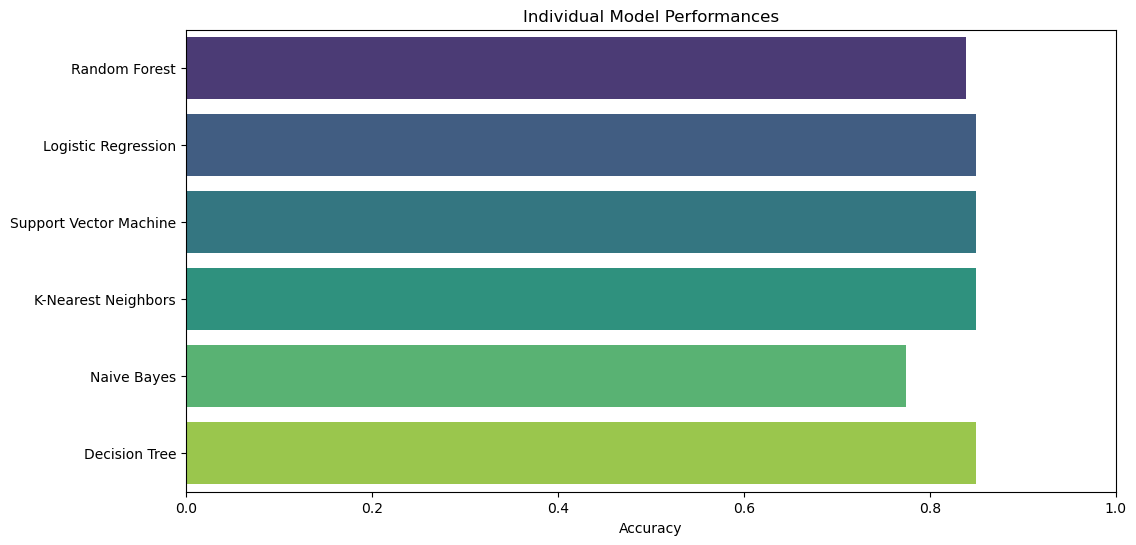

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Individual Model Performances')
plt.xlim(0, 1)  
plt.show()

In [163]:
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'Decision Tree']

f1_scores = [0.747715, 0.743514, 0.704397, 0.726046, 0.614248, 0.775865]

recall = [0.494697, 0.849462, 0.658333, 0.723485, 0.553788, 0.800758]

#### F1-Score Comparison  <a id='sec_4_2'></a>

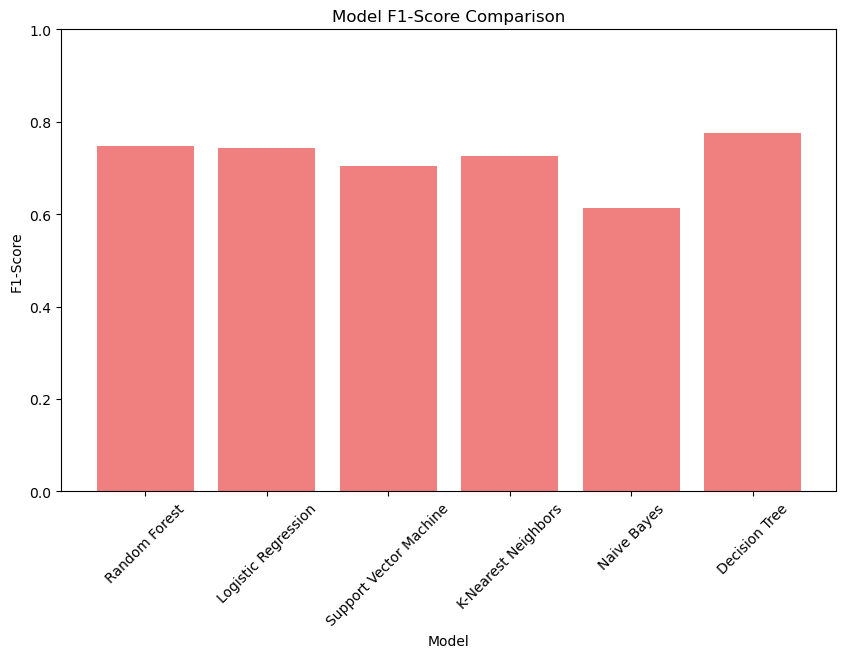

In [164]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

#### Recall Comparison  <a id='sec_4_3'></a>

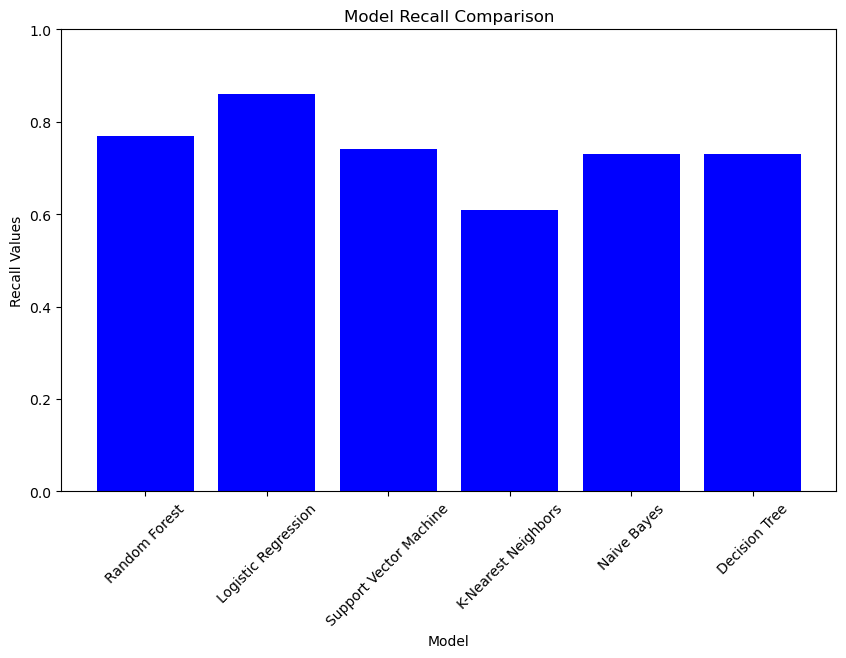

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, recall, color='blue')
plt.xlabel('Model')
plt.ylabel('Recall Values')
plt.title('Model Recall Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### Considering Recall Over Precision -

![Alt Text](https://assets-global.website-files.com/5fb24a974499e90dae242d98/61b7eae310d746073395f4d8_5f214d177a754bee702d8a23_5ee3c707aad88e01181150be_adrian%2520nuovo%25202.jpeg)


#### Recall 
It is the ability of a model to identify all relevant instances or true positives out of the total actual positive instances.

#### Precision 
It measures the accuracy of a model's positive predictions, particularly how many of the predicted positive instances are true positives.

In our model, we would prefer recall over precision because in medical applications, the consequences of missing a true positive (a false negative) can be severe, potentially leading to delayed or missed diagnoses, which can be life-threatening. Maximizing recall helps ensure that a higher proportion of actual positive cases are correctly identified, reducing the chances of false negatives. 
Also, detecting diseases or medical conditions at an early stage is crucial for effective treatment. High recall ensures that a larger percentage of actual positive cases are identified, even if it comes at the cost of a few false positives. This can lead to earlier interventions and better patient outcomes.

----------------------------------------------------


-----------------------------------------------------------------------------------------------------
## Section 5 : Model Benchmarking <a id='sec_5'></a>
-----------------------------------------------------------------------------------------------------

Confusion matrix provides a detailed breakdown of the performance of a classification model, where each row represents the actual class, and each column represents the predicted class. It helps in assessing how well the model is performing for each class in a multi-class classification problem.

![Alt Text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Example-Confusion-matrix.png)


![Alt Text](https://blog.nillsf.com/wp-content/uploads/2020/05/image-36.png)

In [150]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_test_lr)))
class_labels = list(unique_classes)
confusion_mat = confusion_matrix(y_test, y_pred_test_lr)
confusion_df = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)
print('Confusion Matrix of Logistic Regression:')
confusion_df

Confusion Matrix of Logistic Regression:


,ABD PEL,CAP,CHEST,HEAD,HEART,LE,MAXILLOFACIAL,NECK,PELVIS,SPINE,UE
ABD PEL,40,0,0,0,0,0,0,0,0,0,0
CAP,0,1,2,0,0,0,0,0,0,0,0
CHEST,2,0,6,0,0,0,0,0,0,0,0
HEAD,4,0,0,6,0,0,0,0,0,0,0
HEART,0,0,0,0,2,0,0,0,0,0,0
LE,0,0,0,0,0,5,0,0,0,0,0
MAXILLOFACIAL,3,0,0,0,0,0,1,0,0,0,0
NECK,0,0,0,0,0,0,0,8,0,0,0
PELVIS,2,0,0,0,0,0,0,0,0,0,0
SPINE,0,0,0,0,0,0,0,0,0,5,0


A detailed explanation of the confusion matrix :

The provided table is a confusion matrix for a logistic regression model, which is a type of machine learning model used for binary classification (predicting one of two classes, typically 0 or 1). This confusion matrix is for a multi-class classification problem with 12 classes, where the model predicts one of these 12 categories for each input.

In a confusion matrix, each row represents the actual or true class, and each column represents the predicted class by the model. The numbers in the matrix represent the count of instances falling into each combination of actual and predicted classes.

Rows: These are the actual or ground truth classes.  
Columns: These are the classes predicted by the logistic regression model.  
For each cell in the matrix: The value in cell (i, j) represents the number of instances where the true class is the i-th class and the model predicted the j-th class.

### ABD PEL:

The model correctly predicted the class "ABD PEL" 40 times (True Positives or TP).
There were no instances where the model incorrectly predicted "ABD PEL" as something else (False Positives or FP).
There were no instances where the model failed to predict "ABD PEL" when it should have (False Negatives or FN).

### CAP:

The model correctly predicted the class "CAP" 1 time (True Positives or TP).
There were no instances where the model incorrectly predicted "CAP" as something else (False Positives or FP).
There were 2 instances where the model failed to predict "CAP" when it should have (False Negatives or FN).

### CHEST:

The model correctly predicted the class "CHEST" 6 times (True Positives or TP).
There were no instances where the model incorrectly predicted "CHEST" as something else (False Positives or FP).
There were no instances where the model failed to predict "CHEST" when it should have (False Negatives or FN).

### HEAD:

The model correctly predicted the class "HEAD" 6 times (True Positives or TP).
There were no instances where the model incorrectly predicted "HEAD" as something else (False Positives or FP).
There were no instances where the model failed to predict "HEAD" when it should have (False Negatives or FN).

### HEART:

The model correctly predicted the class "HEART" 2 times (True Positives or TP).
There were no instances where the model incorrectly predicted "HEART" as something else (False Positives or FP).
There were no instances where the model failed to predict "HEART" when it should have (False Negatives or FN).

### LE:

The model correctly predicted the class "LE" 5 times (True Positives or TP).
There was 1 instance where the model incorrectly predicted "LE" as something else (False Positives or FP).
There were no instances where the model failed to predict "LE" when it should have (False Negatives or FN).

### MAXILLOFACIAL:

The model correctly predicted the class "MAXILLOFACIAL" 1 time (True Positives or TP).
There were no instances where the model incorrectly predicted "MAXILLOFACIAL" as something else (False Positives or FP).
There were no instances where the model failed to predict "MAXILLOFACIAL" when it should have (False Negatives or FN).

-------------------------------------------------------

### Classification Parameters -

In [151]:
print("Logistic Regression (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_lr).transpose()
df

Logistic Regression (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.769231,1.000000,0.869565,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,1.000000,0.600000,0.750000,10.000000
HEART,1.000000,1.000000,1.000000,2.000000
LE,1.000000,1.000000,1.000000,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000


The report above is typically known as a classification report, and it's commonly used in the evaluation of machine learning models, particularly for classification tasks. This report summarizes the performance of a machine learning model in categorizing data into different classes.

#### Precision: 
Precision is a measure of how many of the predicted positive instances were actually correct. It's calculated as the number of true positives (correctly predicted positive instances) divided by the total number of instances predicted as positive (true positives + false positives). In the report, we can see precision values for each class, indicating how well the model is at correctly identifying that class.

![Alt Text](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63528aff738b370197906164_Precision%2C%20recall.png)

#### Recall (Sensitivity): 
Recall, also known as sensitivity or true positive rate, measures how many of the actual positive instances were correctly predicted. It's calculated as the number of true positives divided by the total number of actual positive instances (true positives + false negatives). In the report, we can see recall values for each class, showing how well the model captures each class.

#### F1-Score: 
![Alt Text](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63b413d5d222e7befdc535e8_639c3b7247e46b63fc2aa60b_HERO%2520Orange.jpeg)
The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics and is especially useful when dealing with imbalanced datasets. The F1-score is calculated as 2 * (precision * recall) / (precision + recall). In the report, we can see the F1-score for each class.


#### Support: 
Support represents the number of instances in each class in the test dataset. It tells how many data points belong to each class.

#### Accuracy: 
![Alt Text](https://assets-global.website-files.com/6266b595eef18c96eef938e2/644c365bbd4d1ca2e54a5bde_classification_metrics_img_source.002-min.png)
The overall accuracy is a measure of how many predictions were correct out of the total number of predictions. It's calculated as the number of correct predictions (true positives + true negatives) divided by the total number of predictions.

#### Macro Average (Macro Avg):
This row provides the average precision, recall, and F1-score across all classes. It treats each class equally, regardless of class size. This can be useful when we want to understand the model's overall performance without bias towards the majority class.

![Alt Text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRu4DTzklid99E8BznjOXvPF2KntanQWShbCA&usqp=CAU)

#### Weighted Average (Weighted Avg):
This row provides the weighted average of precision, recall, and F1-score, taking into account the class sizes. It gives more weight to larger classes, making it useful when dealing with imbalanced datasets.


----------------------------


### Unseen Data Prediction

#### Step 1 : Taking an unseen data file

In [152]:
data_test = pd.read_csv("dataset_01.csv") 
data_test

,index,Exam Type,Protocol,Study Description
0,48,UE,Right Wrist 2mm,CT WRIST W/O CONTRAST RIGHT
1,54,UE,WRIST_HAND,CT RADIUS ULNA LEFT WO CONTRAST
2,83,UE,UPPERExtremity,CT UPPER EXTREMITY LEFT WITH CONTRAST
3,86,UE,UPPER_EXT,CT HUMERUS W/ CONTRAST LEFT
4,91,UE,UPPER EXT CTA,CT ANGIOGRAPHY UPPER EXTREMITY RIGHT
...,...,...,...,...
277,255185,BIOPSY/PROCEDURE,BIOPSY,CT GUIDED DRAINAGE
278,255260,BIOPSY/PROCEDURE,CT_BIOPSY,CT BIOPSY BONE
279,257279,BIOPSY/PROCEDURE,CHEST_PROCEDURE,CT GUIDED BIOPSY
280,257823,BIOPSY/PROCEDURE,INTERVENTION CHEST,CT GUIDED BIOPSY


In [153]:
df_test = pd.DataFrame(data)

#### Step 2 : Setting the training parameters

In [154]:
df_test['Text'] = df_test['Protocol'] + ' ' + df_test['Study Description']

In [155]:
X = df_test['Text']
y = df_test['Exam Type']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [156]:
# Function to train and evaluate models
def train_and_evaluate_model(pipeline, X_train, y_train, X_val, y_val, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    report_val = classification_report(y_val, y_pred_val, output_dict=True)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)
    return accuracy_val, report_val, y_pred_val, accuracy_test, report_test, y_pred_test

#### Step 3 : Training the data with one of the above models

In [157]:
logistic_regression_pipeline_combined = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
accuracy_val_combined_lr, report_val_combined_lr, y_pred_val_lr, accuracy_test_combined_lr, report_test_combined_lr, y_pred_test_lr = train_and_evaluate_model(logistic_regression_pipeline_combined, X_train, y_train, X_val, y_val, X_test, y_test)
print("Logistic Regression (Combined Approach) Accuracy: {:.2f}%".format(accuracy_test_combined_lr * 100))



Logistic Regression (Combined Approach) Accuracy: 84.95%


In [158]:
print("Logistic Regression (Combined Approach) Report:")
print(" ")
print(" ")
df = pd.DataFrame(report_test_combined_lr).transpose()
df

Logistic Regression (Combined Approach) Report:
 
 


,precision,recall,f1-score,support
ABD PEL,0.769231,1.000000,0.869565,40.000000
CAP,1.000000,0.333333,0.500000,3.000000
CHEST,0.750000,0.750000,0.750000,8.000000
HEAD,1.000000,0.600000,0.750000,10.000000
HEART,1.000000,1.000000,1.000000,2.000000
LE,1.000000,1.000000,1.000000,5.000000
MAXILLOFACIAL,1.000000,0.250000,0.400000,4.000000
NECK,1.000000,1.000000,1.000000,8.000000
PELVIS,0.000000,0.000000,0.000000,2.000000
SPINE,1.000000,1.000000,1.000000,5.000000
